# Mesa Granovetter example - Granovetter threshold model

## Description

Models of collective behavior are developed for situations where actors have two alternatives. The Granovetter's models treats binary decisions-those where an actor has two distinct and mutually exclusive behavioral alternatives. In most cases the decision can be thought of as having a positive and negative side- deciding to do a thing or not to, as in deciding whether to join a riot. And the costs and/or benefits of each depend on how many other actors choose which alternative. We may take riots as an example. The cost to an individual of joining a riot declines as riot size increases, since the probability of being apprehended is smaller the larger the number involved.

The key concept is that of "threshold": the number or proportion of others who must make one decision before a given actor does so; this is the point where net benefits begin to exceed net costs for that particular actor. Different individuals require different levels of safety before entering a riot and also vary in the benefits they derive from rioting. A "radical" will have a low threshold: the benefits of rioting are high to him, the cost of arrest, low. Some would be sufficiently radical to have a threshold of 0%/0-people who will riot even when no one else does. These are the "instigators." Conservatives will have high thresholds: the benefits of rioting are small or negative to them and the consequences of arrest high since they are likely to be "respectable citizens" rather than "known rabble-rousers." Thresholds of 80% or 90% may be common, and we may allow for those individuals who would not join under any circumstances by assigning them a threshold of 100%. It is not necessary, in fact, to be able to classify a person as radical or conservative from his threshold, and one strength of the concept is that it permits us to avoid such crude dichotomies.

Beginning with a frequency distribution of thresholds, the models allow calculation of the ultimate or "equilibrium" number making each decision. The stability of equilibrium results against various possible changes in threshold distributions is considered.
Stress is placed on the importance of exact distributions for outcomes.

Groups with similar average preferences may generate very different results. The models Granovetter describes, by contrast, take as the most important causal influence on outcomes the **variation** of norms and preferences within the interacting group. The normal frequency distribution is of interest here because we may take it to be characteristic of populations where no strong tendencies of any kind exist to distort a distribution of preferences away from its regular variation about some central tendency. Yet, the results obtained are striking and counterintuitive.     

## Sample Model Description

The excercise model is a very simple simulated agent threshold model. The aim of the formal model presented here is the same: to predict, from the initial distribution of thresholds, the ultimate number or proportion making each of the two decisions. Mathematically, the question is one of finding an equilibrium in a process occurring over time. 

The rules of our tutorial model:

1. There are some number of agents.
2. All agents begin with an engagagement threshold for joining a riot
3. At every step of the model, an agent considers all other agents joining the riot to see if the proportion is above its own treshold
4. If the agent observes that the proportion of other agents joining the riot is above or equal to its own treshold, the agent joins the riot; otherwise, an agent doesn't.

Despite its simplicity, this model yields results that are often unexpected to those not familiar with it.

## How to use and modify the code

These excercises are designed around a Mesa template that is given to you to reuse. You are not asked to perform any complex object programming, but instead we ask for understanding of the core features of the Mesa pyhton package. You will mostly have to modifly the existing template and code the ``Model`` and ``Agent``behavior using standard python code.

**Therefore, in this excercise, you are asked to fill your code where the comments state:**

``#[Your code here]``

**Please don't change the already given values in the examples ad

**IMPORTANT!** 
- The code output should print the values that you use for discussion in the text of the answer, otherwise, we as graders cannot see the values from your simlation run in PDF.
- Upon submitting the PDF notebook, please use the example simulation values already given in the questions. Of course, it is natural that you experiment with different code and simulation values before submission.

Let’s get started.

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

Now, let’s use a more advanced one: ``SimultaneousActivation``, which simulates the simultaneous activation of all the agents. This scheduler requires that each agent have two methods: ``step`` and ``advance``. step() activates the agent and stages any necessary changes, but does not apply them yet. advance() then applies the changes.

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

Each agent has a few parameters:
- engagement treshold - an agent's threshold for joining a riot is defined here as the proportion of the group he would have to see join before he would do so
- decision_reached - has the agent observed the proportion above its treshold of other agents joining the riot (boolean)
- engaged - has the agent joined the riot (boolean)

(Each agent will also have a unique identifier (i.e., a sequence position), stored in the ``unique_id`` variable. Giving each agent a unique id is a good practice when doing agent-based modeling.)

### At the location ``# 2 Step agent function [Your code here]`` you have to implement:

- if the agent is `engaged` in a riot then no behavior is needed, agent is already rioting

### At the location ``# 3 Proportion of these other agents joining the riot [Your code here]`` you have to implement:

- get a list of all scheduled agents
- calculate the proportion of these other agents joining the riot

### At the location ``# 4 Binary decision [Your code here]`` you have to implement:

- if the proportion of other agents joining the riot are above agent's treshold
- set this agent to have observed the proportion above its treshold of other agents joining the riot

### At the location ``# 5 Advance agent function [No coding necessary]``:

- if the agent is `engaged` in a riot then no simultaneous behavior is needed, agent is already rioting
- count up by 1 the number of rioting agents in the model
 
### At the location ``# 6 Engage decided agents simultaneously [No coding necessary]``:

- if the agent has already have observed the proportion above its treshold of other agents joining the riot
- set the agent as `engaged` in the riot

The beginning of both classes looks like this:

In [1]:
import mesa
from mesa import Model
from mesa import Agent
from mesa.time import SimultaneousActivation
from mesa.time import BaseScheduler

import numpy as np

In [2]:
class GranovetterAgentBasic(Agent):
    
    def __init__(self, unique_id, engagement_threshold, model):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent
            engagement_threshold: An agent's threshold for joining a riot
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        self.engagement_threshold = engagement_threshold
        self.decision_reached = False  # Initialize decision status
        self.engaged = False  # Initialize engagement status
            
    
    # agent step: 'rules' behavior when activated
    def step(self):
        '''
        Run one step of the agent.
        '''
        # 2 Step agent function [Your code here]
        if self.engaged == True:
            return 
        
            
        # 3 Proportion of these other agents joining the riot [Your code here]
            
        total_agents = len(self.model.schedule.agents)  # Total number of agents 
        rioting_agents = sum(agent.engaged for agent in self.model.schedule.agents)
        proportion_engaged = rioting_agents/total_agents
        
                
        # 4 Binary decision [Your code here]
        
        if (self.engagement_threshold == 0) or (proportion_engaged > self.engagement_threshold):
            self.decision_reached = True
            self.engaged = True
            
          
    # agent advance: 'simultaneous' behavior when activated
    def advance(self):
        
        # 5 Advance agent function
        if self.engaged == True:
            self.model.engaged += 1 
            return
        
        # 6 Engage decided agents simultaneously
        elif self.decision_reached == True:
            self.model.engaged += 1
            self.engaged = True


## Adding the scheduler

Time in most agent-based models moves in steps, sometimes also called
**ticks**. At each step of the model, one or more of the agents –
usually all of them – are activated and take their own step, changing
internally and/or interacting with one another or the environment.

The **scheduler** is a special model component which controls the order
in which agents are activated. For example, all the agents may activate
in the same order every step; their order might be shuffled; we may try
to simulate all the agents acting at the same time; and more. Mesa
offers a few different built-in scheduler classes, with a common
interface. That makes it easy to change the activation regime a given
model uses, and see whether it changes the model behavior. This may not
seem important, but scheduling patterns can have an impact on your
results.

Now, let’s use a more advanced one: ``SimultaneousActivation``, which simulates the simultaneous activation of all the agents. This scheduler requires that each agent have two methods: ``step`` and ``advance``. step() activates the agent and stages any necessary changes, but does not apply them yet. advance() then applies the changes.

With that in mind, the model code with the scheduler added looks like
this:

### At the location ``# 1 Initialization [Your code here]`` you have to implement:

There are a number of model-level parameters. When a new model is started, we want it to populate itself
with the given number of agents.

- N - number of agents the model contains
- mu - central tendency of the tresholds distribution
- sigma - standard deviations of the tresholds distribution
- set the model's `engaged` agents counter to zero at the start
- set the `running` state variable to True
- Use ``SimultaneousActivation`` scheduler

### At the location ``# 2 Create agents [Your code here]`` you have to implement:

- populate the model with the given number of agents in a loop
- assign engagement rates based on normal distribution (make all negative rate values clip to zero) - **hint:** you can use already given `self.random.gauss()` method (remember that Mesa already gives us the `random` package through the `self.random` parameter)
- add created agents to the scheduler

When a new model is started, we want it to populate itself with the defined number of agents with engagement tresholds distributed normally around some central tendency with a given standard deviation.

In [3]:
class GranovetterModelBasic(Model):

    def __init__(self, N, mu, sigma):
        '''
        Create a new Granovetter model.

         Args:
            N: how many agents the model contains
            mu: central tendency of the tresholds distribution
            sigma: standard deviations of the tresholds distribution
        '''
        
        super().__init__()
        
        # 1 Initialization [Your code here]
        
        self.num_agents = N
        self.mu = mu
        self.sigma = sigma
        self.engaged = 0
        self.engaged_percentage = [] #To answer question 1
        self.schedule = SimultaneousActivation(self)
        self.running = True
        
        # 2 Create agents [Your code here]
        for i in range(self.num_agents):
            uniqueId = i
            engagement_threshold = np.clip(self.random.gauss(mu, sigma), 0, None)
            agent = GranovetterAgentBasic(uniqueId, engagement_threshold, self)
            self.schedule.add(agent)

    

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function

        # Reset counter of engaged agents each model step
        self.engaged = 0
        self.schedule.step()
                
        
        # 4 Stop the model if all agents are engaged
        if self.engaged == self.schedule.get_agent_count():
            self.running = False
            
    

# 2. Run the Agent/Model Basic

### Running the model

At this point, we have a model which runs. 
You can see for yourself with a few easy lines. If you’ve been working in an jupyter notebook session, you can create a model object directly. 

With that last piece in hand, it’s time for the first rudimentary run of the model.

Now let’s create a model with 100 agents, and run it for 100 steps. Set the normal distribution of agent's engagement treshold to proposal. ``mu = 0.25`` and ``sigma = 0.1``.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- number of agents is given already as 100
- specify: mu and sigma

In [24]:
model = GranovetterModelBasic(100,0.25, 0.1) # < Add model parameters [Your code here] )
print(model.schedule)

while model.running and model.schedule.steps < 100:
    model.step()

                           
print('The Schelling Model ran for {} steps'.format(model.schedule.steps))

The Schelling Model ran for 100 steps


## Question 1

It is possible to give a mathematically exact transformation from a frequency distribution of thresholds to an equilibrium value outcome.

Run your Granovetter model till it converges (e.g., ``mu = 0.25``, ``sigma = 0.1`` and 100 steps should be enough) then observe the percentage of engaged agents ``r``. Now, sort the tresholds of all active agents and then sort the tresholds of all inactive agents. Calculate and verify the following two aspects of the equilibrium value outcome: 

1.1 Verify that F(r) is correct - proportion of the population having threshold less than or equal to the equilibrium value.

1.2 Verify that ``r`` is correct - proportion of the population who have joined the riot.

Put your code for answers 1.1 and 1.2 in the box below.

In [25]:
# Answer 1.1 and 1.2 [Your code here]

#Calculate the percentage of engaged agents
engaged_agents = sum(agent.engaged for agent in model.schedule.agents)
all_agents = len(model.schedule.agents)
percentage_engaged = engaged_agents / all_agents
print('The percentage of engaged agents is:{}'.format(percentage_engaged))
        
# Thresholds of active and inactive agents
all_thresholds = []
active_agents_thresholds = []
inactive_agents_thresholds = []

for agent in model.schedule.agents:
    if agent.engaged:
        active_agents_thresholds.append(agent.engagement_threshold)
    else:
        inactive_agents_thresholds.append(agent.engagement_threshold)

# Sort the thresholds
active_agents_thresholds.sort()
inactive_agents_thresholds.sort()

print("Sorted thresholds of active agents:", active_agents_thresholds)
print("Sorted thresholds of inactive agents:", inactive_agents_thresholds)

equilibrium_threshold = active_agents_thresholds[-1] if active_agents_thresholds else 0
print("Threshold of the last active agent:", equilibrium_threshold)

#Answer 1.1
    
#Calculate F_r    
def calculate_F_r(model):
    
    thresholds = [agent.engagement_threshold for agent in model.schedule.agents]
    num_engageable_agents = sum(threshold <= equilibrium_threshold for threshold in thresholds)
    return num_engageable_agents/ len(thresholds)

print('The F_r is:',calculate_F_r(model))

#Answer 1.2
#Calculate r

def calculate_r(model):
    all_agents_engaged = sum(agent.engaged for agent in model.schedule.agents)
    return all_agents_engaged / len(model.schedule.agents)
print('The r is:',calculate_r(model))

The percentage of engaged agents is:0.01
Sorted thresholds of active agents: [0.0]
Sorted thresholds of inactive agents: [0.016110007917235603, 0.029181420086779347, 0.04695252547892248, 0.07037980810546607, 0.0738814583988388, 0.09358312288448001, 0.1164372291446312, 0.13156531481195666, 0.13541542514307026, 0.1432947612428062, 0.1480447834687577, 0.1528003598997985, 0.1596255866168803, 0.1625102821749438, 0.16444717994513153, 0.16803518586918834, 0.16975706736959695, 0.17589370465010545, 0.17695557008021973, 0.18241936812634219, 0.18435959634137106, 0.18451364691823785, 0.18542474730734526, 0.1913090317425928, 0.2010507676746143, 0.203703241238126, 0.20712331159245076, 0.20845574856867471, 0.21423708215105824, 0.22526167676283224, 0.22534987926220879, 0.22665433874573374, 0.22964230157960625, 0.23237981460112417, 0.23444590222638043, 0.23644479271773208, 0.23647120060925972, 0.23667347281280432, 0.2449805491702186, 0.2463471613460402, 0.24786056511983512, 0.2483311656974102, 0.252279

1.3. Do you find that ``r == F(r)``?

1.4. How many agents get activated during the first step? Explain why it works like this?

1.5. If we changed mu to be slightly higher, how would it affect the first step of the simulation?

Answer in text below

## Answer 1.3 and 1.4 and 1.5

1.3 Yes

1.4 1 (one) agent. Because it was the only agent with a 0 (zero) threshold.

1.5 The chance of any agent riot would decrease as the threshold's values increase. 

# 5. Collect data to Analyze the Agent/Model

### Collecting Data

Since one of the main goals of agent-based modeling is generating data
for analysis, Mesa provides a class which can handle data collection and
storage for us and make it easier to analyze.

The data collector stores three categories of data: model-level
variables, agent-level variables, and tables (which are a catch-all for
everything else). Model- and agent-level variables are added to the data
collector along with a function for collecting them. Model-level
collection functions take a model object as an input, while agent-level
collection functions take an agent object as an input. Both then return
a value computed from the model or each agent at their current state.
When the data collector’s ``collect`` method is called, with a model
object as its argument, it applies each model-level collection function
to the model, and stores the results in a dictionary, associating the
current value with the current step of the model. Similarly, the method
applies each agent-level collection function to each agent currently in
the schedule, associating the resulting value with the step of the
model, and the agent’s ``unique_id``.

Let’s add a DataCollector to the model, and collect two variables. At
the agent level, we want to collect every agent’s engaged state at every step.
At the model level, let’s measure the proportion of engaged agents at every step.

### At the location ``# Analysis code for calculating proportion of engaged agents [Your code here]`` you have to implement:

- calculate proportion of engaged agents over all agents

### Agent code should be the same (copy your code from above)

### Model code has a ``DataCollector`` step

- note the use of ``DataCollector`` to collect the following model-level data:
- model's engagement ratio
- agent's ``engaged`` stats
- ``collect`` data every model's ``step``

In [42]:
def get_engagement_ratio(model):
    '''
    Find the % of agents that are rioting.
    '''
    # Analysis code for calculating proportion of engaged agents [Your code here]

    engagement_rate = sum(agent.engaged for agent in model.schedule.agents)/model.N
    return engagement_rate

In [43]:
class GranovetterAgentAnalysis(Agent):
    
    def __init__(self, unique_id, engagement_threshold, model):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent
            engagement_threshold: An agent's threshold for joining a riot
        '''
        
        super().__init__(unique_id, model)
        
        # 1 Initialization [Your code here]
        self.engagement_threshold = engagement_threshold
        self.decision_reached = False  # Initialize decision status
        self.engaged = False  # Initialize engagement status
            
    
    # agent step: 'rules' behavior when activated
    def step(self):
        '''
        Run one step of the agent.
        '''
        # 2 Step agent function [Your code here]
        if self.engaged == True:
            return 
        
            
        # 3 Proportion of these other agents joining the riot [Your code here]
            
        total_agents = len(self.model.schedule.agents)  # Total number of agents 
        rioting_agents = sum(agent.engaged for agent in self.model.schedule.agents)
        proportion_engaged = rioting_agents/total_agents
        
        #print('Agent {}: Proportion engaged: {}, Threshold: {}'.format(self.unique_id, proportion_engaged,self.engagement_threshold))
        
                
        # 4 Binary decision [Your code here]
        
        if (self.engagement_threshold == 0).any() or (proportion_engaged > self.engagement_threshold).any():
            self.decision_reached = True
            self.engaged = True
            
          
    # agent advance: 'simultaneous' behavior when activated
    def advance(self):
        
        # 5 Advance agent function
        if self.engaged == True:
            self.model.engaged += 1 
            return
        
        # 6 Engage decided agents simultaneously
        elif self.decision_reached == True:
            self.model.engaged += 1
            self.engaged = True

In [44]:
from mesa.datacollection import DataCollector

class GranovetterModelAnalysis(Model):

    def __init__(self, N, mu, sigma):
        '''
        Create a new Granovetter model.

         Args:
            N: how many agents the model contains
            mu: central tendency of the tresholds distribution
            sigma: standard deviations of the tresholds distribution
        '''
        
        super().__init__()
        
        # 1 Initialization 
        self.N = N
        self.mu = mu
        self.sigma = sigma
        self.counter = 0
        self.schedule = SimultaneousActivation(self)
        self.running = True
        self.datacollector = DataCollector(    # < Note that we have both an agent and model data collector
            model_reporters={"engagement_ratio": get_engagement_ratio}, agent_reporters={"engaged": "engaged"}
        )
        

            
        # Iterate over the range of sigmas and create a model instance for each sigma value
        #for sigma in self.sigmas:
            
            # 2 Create agents 
        for i in range(N):
            uniqueId = i
            engagement_threshold = np.clip(self.random.gauss(mu, sigma), 0, None)
            agent = GranovetterAgentAnalysis(uniqueId, engagement_threshold, self)
            self.schedule.add(agent)


    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        # 3 Step model function

        # Reset counter of engaged agents each model step
        self.engaged = 0
        self.datacollector.collect(self)
        self.schedule.step()
        
        
        # 4 Stop the model if all agents are engaged
            
        if self.engaged == self.schedule.get_agent_count():
            self.running = False
            
    

### Running the model

We run the model just as we did above. Now is when an interactive
session, especially via a Notebook, comes in handy: the DataCollector
can export the data it’s collected as a pandas DataFrame, for easy
interactive analysis.

Now we instantiate a model instance: 100 agents, with normal distribution of agent's engagement treshold to ``mu = 0.25`` and ``sigma = 0.122``. Run the model for 100 steps.

We want to run the model until all the agents are rioting. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- number of agents is given already as 100
- specify: mu and sigma

In [45]:
model = GranovetterModelAnalysis(100, 0.25, 0.122) # < Add model parameters [Your code here] )

while model.running and model.schedule.steps < 100:
    model.step()
    model.datacollector.collect(model)
                            
print('The Schelling Model ran for {} steps'.format(model.schedule.steps))
model.datacollector.collect(model)

The Schelling Model ran for 100 steps


# 6. Run the Agent/Model Analysis

Now we can get the agent-engagement data:

**It is always a good practice to validate (debug) your model with visualizing agents behavior.**

### At the location ``Create a plot for the engagement state of a single agent over the model steps [Your code here]`` you have to implement:

- filter the data to select only one agent - using Pandas .xs method
- plot the ``engaged`` state of that agent data you have collected

In [46]:
import pandas as pd

agent_out = model.datacollector.get_agent_vars_dataframe()
len(agent_out[agent_out['engaged'] == False])

9802

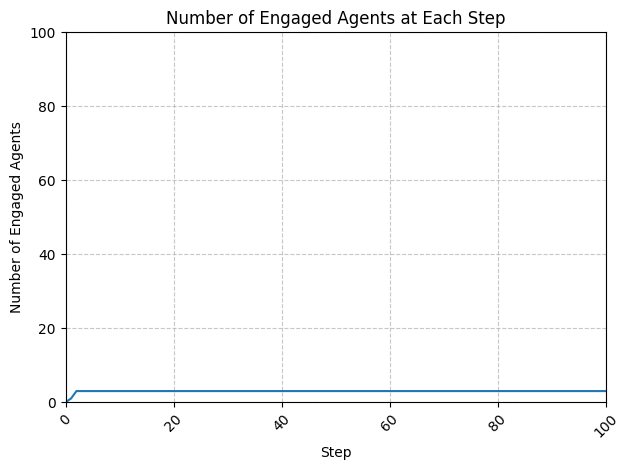

In [47]:
# Create a plot for the engagement state of a single agent over the model steps [Your code here]

import matplotlib.pyplot as plt
import seaborn as sns
engaged_agents_count = agent_out.groupby("Step")["engaged"].sum()

#plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_agents_count)
#plt.plot(engaged_agents_count.values, marker='o', linestyle='-')
plt.xlabel("Step")
plt.ylabel("Number of Engaged Agents")
plt.title("Number of Engaged Agents at Each Step")
plt.grid(True, linestyle='--', alpha=0.7)

# Set limits for Y and X axes
plt.ylim(0, 100)  # Y-axis limits from 0 to 100
plt.xlim(0, 100)  # X-axis limits from 0 to 100

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Similarly, we can get the model-engagement ratio data.

You’ll see that the DataFrame’s index is pairings of model step and agent ID. You can analyze it the way you would any other DataFrame.

### At the location ``# Create a plot for the proportion of all engaged agents over the model steps [Your code here]`` you have to implement:

- plot the ``engagement_ratio`` data you have collected

In [48]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

,engagement_ratio
0,0.00
1,0.01
2,0.01
3,0.03
4,0.03


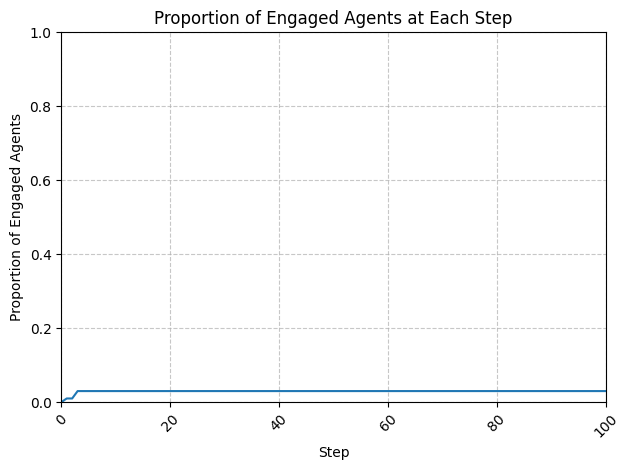

In [49]:
# Create a plot for the proportion of all engaged agents over the model steps [Your code here]
import matplotlib.pyplot as plt
import seaborn as sns


#plt.figure(figsize=(10, 6))
sns.lineplot(model_out["engagement_ratio"])
#plt.plot(engaged_agents_count.values, marker='o', linestyle='-')
plt.xlabel("Step")
plt.ylabel("Proportion of Engaged Agents")
plt.title("Proportion of Engaged Agents at Each Step")
plt.grid(True, linestyle='--', alpha=0.7)

# Set limits for Y and X axes
plt.ylim(0, 1)  # Y-axis limits from 0 to 100
plt.xlim(0, 100)  # X-axis limits from 0 to 100

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 2

2.1 Plot 2 gaussian distributions (they don't need to be related to the rest of this notebook) with different sigma levels but same mean.

In previous steps you have analysed the Granovetter's model analysis for a low sigma (standard deviation) of engagement tresholds (e.g., ``sigma = 0.1``).

2.2 Now re-run the analysis for a high sigma value (e.g., ``sigma = 0.2``) and once again plot the proportion of engaged agents over the model steps. Now observe the difference in proportion of engaged agents over all agents.

Put your code for the answer 2.1 and 2.2 in the box below.

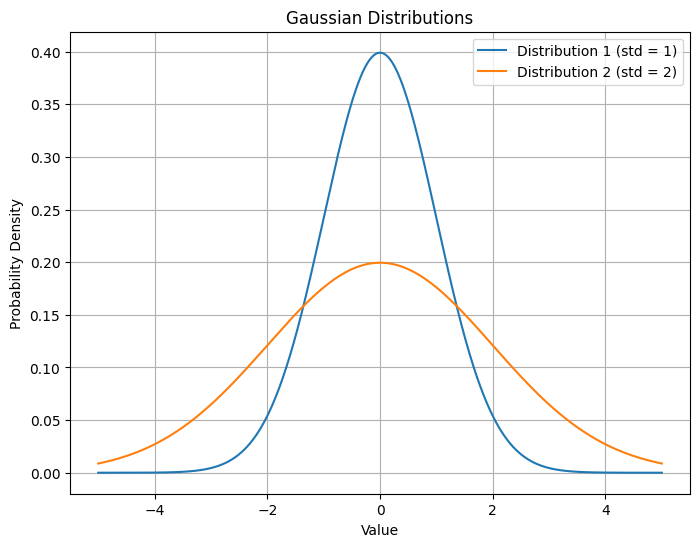

In [50]:
# Answer 2.1 [Your code here]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mean = 0
std_dev1 = 1
std_dev2 = 2

#x values for the plot
x_axis = np.linspace(-5, 5, 1000)  # Adjust the range as needed

#plotting the distrubution
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(x_axis, norm.pdf(x_axis, mean, std_dev1), label='Distribution 1 (std = 1)')
plt.plot(x_axis, norm.pdf(x_axis, mean, std_dev2), label='Distribution 2 (std = 2)')
plt.title('Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

The Schelling Model ran for 3 steps


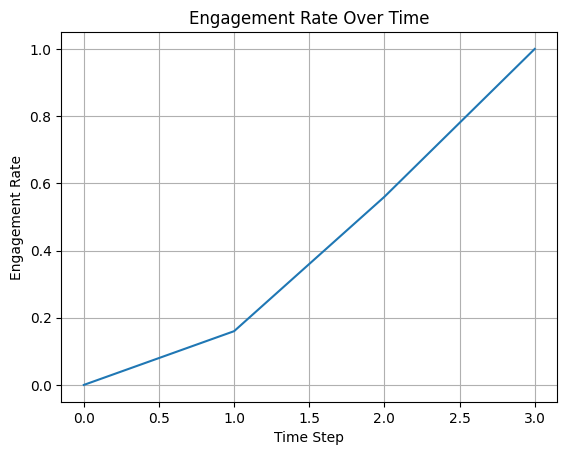

In [51]:
# Answer 2.2 [Your code here]
model = GranovetterModelAnalysis(100, 0.25, 0.2) # < Add model parameters [Your code here] )

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The Schelling Model ran for {} steps'.format(model.schedule.steps))
model.datacollector.collect(model)

model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()
plt.plot(model_out) #have to redefine this but hard when I dont know how it looks like
plt.title('Engagement Rate Over Time')
plt.xlabel('Time Step')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.show()

2.3 Qualitatively describe what is this difference between these two outcomes and why?

2.4 Describe how this changing of sigma relates to precursors(early adopters) and laggards(late adopters).

Answer in text below

## Answer 2.3 and 2.4

[Your text answer here]

The higher the standard deviation the flatter the Gaussian will be. 
2.3 If the engagement rate has a higher variation it will take longer to be stable?
2.4 It just becomes a bigger difference between early adopters and late adopters. Since the variance is higher for the threshold. For some the threshold will be low so that they sooner will be enganging and for the laggards the threshold will be higher so that it will take longer time before they are engangig. 

# 7. Create iteration Batch of the Agent/Model

### Batch Run

Like we mentioned above, you usually won’t run a model only once, but
multiple times, with fixed parameters to find the overall distributions
the model generates, and with varying parameters to analyze how they
drive the model’s outputs and behaviors. Instead of needing to write
nested for-loops for each model, Mesa provides a ``batch_run`` function
which automates it for you.

The batch runner also requires an additional variable ``self.running``
for the Model class. This variable enables conditional shut off of
the model once a condition is met.

### At the location ``# < Add model parameters [Your code here]`` you have to implement:

- specify all model-level parameters of its __init__ function
- number of agents is given already as 100
- specify: ``mu = 0.25`` and ``sigma as [0.0, 1.0, equally spaced 11 values]``

**Hint**: Instead of using python's ``range()`` method that returns integer values, you can use ``linspace()`` method from the ``numpy`` lbrary as follows:

``
import numpy as np
np.linspace(0,1,11)
``

In [52]:
import numpy as np
from mesa import Model

params = {"N": 100, "mu" : 0.25, "sigma" : np.linspace(0, 1, 11)} # < Add model parameters [Your code here] }

model = GranovetterModelAnalysis(100, 0.25, np.linspace(0, 1, 11))
while model.running and model.schedule.steps < 100:
    model.step()

# 8. Run the Agent/Model Batch

### Running the model

We call ``batch_run`` with the following arguments:

* ``model_cls``

  The model class that is used for the batch run.

* ``parameters``

  A dictionary containing all the parameters of the model class and
  desired values to use for the batch run as key-value pairs. Each
  value can either be fixed ( e.g. ``{"height": 10, "width": 10}``)
  or an iterable (e.g. ``{"homophily": range(0,100, 13)}``). ``batch_run``
  will then generate all possible parameter combinations based on this
  dictionary and run the model ``iterations`` times for each combination.

* ``number_processes``

  Number of processors used to run the sweep in parallel. Optional.
  If not specified, defaults to use all the available processors.

  Note: Multiprocessing does make debugging challenging. If your
  parameter sweeps are resulting in unexpected errors set ``number_processes = 1``.
  
  Also, if your batcher is stuck and is not running for some reason, try also setting ``number_processes = 1``, since this issue might also be related to multiprocessing issues.

* ``iterations``

  The number of iterations to run each parameter combination for. Optional.
  If not specified, defaults to 1.

* ``data_collection_period``

  The length of the period (number of steps) after which the model and
  agent reporters collect data. Optional. If not specified, defaults to -1,
  i.e. only at the end of each episode.

* ``max_steps``

  The maximum number of time steps after which the model halts. An episode
  does either end when ``self.running`` of the model class is set to
  ``False`` or when ``model.schedule.steps == max_steps`` is reached.
  Optional. If not specified, defaults to 1000.

* ``display_progress``

  Display the batch run progress. Optional. If not specified, defaults to ``True``.

In the following example, we hold the height and width fixed, and vary
the homophily treshold of agents. We tell the batch runner to run 10 instantiations
of the model with each number of agents, and to run each for 200 steps.

At the last step of the model (i.e., `data_collection_period=-1`), the datacollector will collect and store the model-level proportion of engaged agents, as well as each agent’s engaged state, associating each with the last step.

In [53]:
# If your batcher is stuck and is not running for some reason, try setting number_processes = 1

from mesa.batchrunner import batch_run


results = batch_run(
    GranovetterModelAnalysis,
    parameters=params,
    iterations=10,
    max_steps=99,
    number_processes=1,
    data_collection_period=-1,
    display_progress=True,
)


  0%|          | 0/110 [00:00<?, ?it/s]

# 9. Run the Batch data Analysis

### Data visualization

First, we want to take a closer look at how the engagement ratio at the end of each episode changes as we increase the standard deviation (sigma) of the engagement tresholds distribution.
For this, we group our data on the ``RunId`` identifier and get a single value per ``RunId`` using a median.
Our results to only contain the data of engagement ratio for the entire population at the final step of each episode and then box-plot the values for the engagement ratio over the standard deviation of engagement tresholds.
Notice there are 10 values for each sigma value since we set ``iterations=10`` when calling the batch run.

In [54]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.head()
print(results_df)

       RunId  iteration  Step    N    mu  sigma  engagement_ratio  AgentID  \
0          0          0    99  100  0.25    0.0               0.0        0   
1          0          0    99  100  0.25    0.0               0.0        1   
2          0          0    99  100  0.25    0.0               0.0        2   
3          0          0    99  100  0.25    0.0               0.0        3   
4          0          0    99  100  0.25    0.0               0.0        4   
...      ...        ...   ...  ...   ...    ...               ...      ...   
10995    109          9    99  100  0.25    1.0               0.6       95   
10996    109          9    99  100  0.25    1.0               0.6       96   
10997    109          9    99  100  0.25    1.0               0.6       97   
10998    109          9    99  100  0.25    1.0               0.6       98   
10999    109          9    99  100  0.25    1.0               0.6       99   

       engaged  
0        False  
1        False  
2        Fal

In [55]:
results_df.groupby(by=["RunId", "iteration", "Step"]).median()

,,,N,mu,sigma,engagement_ratio,AgentID,engaged
RunId,iteration,Step,,,,,,
0,0,99,100.0,0.25,0.0,0.00,49.5,0.0
1,0,99,100.0,0.25,0.1,0.05,49.5,0.0
2,0,2,100.0,0.25,0.2,0.75,49.5,1.0
3,0,99,100.0,0.25,0.3,0.99,49.5,1.0
4,0,99,100.0,0.25,0.4,0.98,49.5,1.0
...,...,...,...,...,...,...,...,...
105,9,99,100.0,0.25,0.6,0.82,49.5,1.0
106,9,99,100.0,0.25,0.7,0.82,49.5,1.0
107,9,99,100.0,0.25,0.8,0.76,49.5,1.0


## Question 3

3.1 Your final task is to investigate how the standard deviation (sigma) of the engagement tresholds distribution influences the final proportion of engaged agents, using a box plot.
Box plot should be able to plot the average outcome for each sigma value.

**Hint 1:** Your plot should look similar to Figure 2 in [this paper](https://www.jstor.org/stable/2778111) or one of the chart from the slides from the lecture. The phase transition should be visible on the graph.

Put your code for answers 3.1 in the box below.

### **Hint 2:** At the location ``# Answer 3.1 [Your code here]`` you have to implement:

- plot the boxplot of engagement ratio values over sigma values from models data you have collected
- using the Pandas ``.boxplot()`` method
- group engagement ratio values by ``sigma``
- plot the ``engagement_ratio`` column

<Figure size 800x600 with 0 Axes>

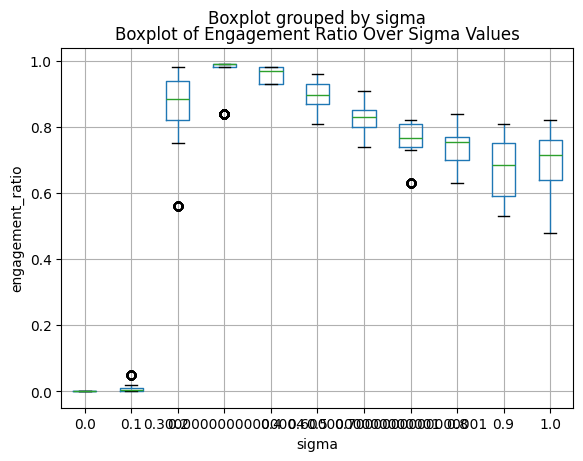

In [56]:
# Answer 3.1 [Your code here]

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
boxplot = results_df.boxplot(column='engagement_ratio', by='sigma')
plt.title('Boxplot of Engagement Ratio Over Sigma Values')
plt.xlabel('sigma')
plt.ylabel('engagement_ratio')
plt.show()

3.2 Do you observe a phase transition in the proportion of engaged agents on your plot, similar to the given paper?

3.3 If so, where aproximately lies the critical sigma value for the phase transition?

3.4 What is the probability for an agent to have engagement treshold of 0 if we run our simulation with parameters for example sigma = 0.1 and mu = 0.2?

Bonus question (not graded): 

What is the probability for an agent to have engagement treshold of 0.2 if we run our simulation with parameters for example sigma = 0.1 and mu = 0.2?



Answer in text below.

## Answer 3.2, 3.3 and 3.4

3.2 Yes

3.3 0.122

3.4 0.022

Bonus question 0.5


In [57]:
import scipy.stats

mu = 0.2
sigma = 0.1

probability = scipy.stats.norm.cdf(0, loc=mu, scale=sigma)
print("Probability for an agent to have engagement threshold of 0:", probability)
probability = scipy.stats.norm.cdf(0.2, loc=mu, scale=sigma)
print("Probability for an agent to have engagement threshold of 0.2:", probability)

Probability for an agent to have engagement threshold of 0: 0.022750131948179198
Probability for an agent to have engagement threshold of 0.2: 0.5
